In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import re
from cleantext import clean

import spacy

import warnings
warnings.filterwarnings("ignore")

from spacy import schemas, Dict, displacy
from spacy.lang.en.stop_words import  STOP_WORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

from spacy.matcher import Matcher

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nlp = spacy.load("en_core_web_trf")

import string
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df = pd.read_csv('resumes_data.csv')
df

,content,category,file_name
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume,ChinnaSubbarayuduM_Hexaware.docx
1,\n\n Madeeswar A\n...,Workday Resume,Madeeswar A_Hexaware.doc
2,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume,Srikanth-Hexaware.docx
3,\nShireesh ...,Workday Resume,ShireeshKumar_Hexaware.doc
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resume,MooraboyinaGuravaiah_Hexaware.docx
...,...,...,...
74,Murali\t\t \n\n\t\n\n\n\n\n\n\n\n\n\n\n\...,Peoplesoft Resume,Peoplesoft FSCM_Murali.docx
75,PeopleSoft Admin\n\nVARKALA VIKAS\n\n\n\nCaree...,Peoplesoft Resume,Peoplesoft Admin_Varkala Vikas.docx
76,\nArun Venu\n\n\n EXPERIENCE SUMMARY\n\n\n ...,Peoplesoft Resume,Peoplesoft Finance_Arun Venu.doc
77,Name: Ravali P \n\n\n\n ...,Internship,Internship_Ravali_Musquare Technologies (1).docx


In [3]:
df.head()

,content,category,file_name
0,Chinna Subbarayudu M\n\nDOB: 06th March 1994\n...,Workday Resume,ChinnaSubbarayuduM_Hexaware.docx
1,\n\n Madeeswar A\n...,Workday Resume,Madeeswar A_Hexaware.doc
2,Srikanth (WORKDAY hCM Consultant)\t ...,Workday Resume,Srikanth-Hexaware.docx
3,\nShireesh ...,Workday Resume,ShireeshKumar_Hexaware.doc
4,Mooraboyina Guravaiah\n\nWorkday Integration S...,Workday Resume,MooraboyinaGuravaiah_Hexaware.docx


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   content    79 non-null     object
 1   category   79 non-null     object
 2   file_name  79 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [5]:
df.isna().count()

content      79
category     79
file_name    79
dtype: int64

In [20]:
lz = WordNetLemmatizer()

In [7]:
def preprocess(txt):
    txt = txt.lower()                                                        # convert all characters in the string to lower case
    txt = re.sub('[^a-zA-Z]', ' ', txt)                                      # remove non-english characters, punctuation and numbers
    txt = re.sub('http\S+\s*', ' ', txt)                                     # remove URLs
    txt = re.sub('RT|cc', ' ', txt)                                          # remove RT and cc
    txt = re.sub('#\S+', '', txt)                                            # remove hashtags
    txt = re.sub('@\S+', '  ', txt)                                          # remove mentions
    txt = re.sub('\s+', ' ', txt)                                            # remove extra whitespace 
    txt = nltk.tokenize.word_tokenize(txt)                                   # tokenize word
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]# remove stop words
    txt =' '.join(txt)  
    txt = [lz.lemmatize(word) for word in txt]
    return ''.join(txt) 

In [10]:
# df['Resumes'] = df['Resumes'].apply(lambda w: preprocess(w))
df['content'] = df['content'].apply(lambda w: preprocess(w))

In [11]:
df.head()

,content,category,file_name
0,chinna subbarayudu dob th march nationality in...,Workday Resume,ChinnaSubbarayuduM_Hexaware.docx
1,madeeswar profile summary around years experie...,Workday Resume,Madeeswar A_Hexaware.doc
2,srikanth workday hcm consultant seeking suitab...,Workday Resume,Srikanth-Hexaware.docx
3,shireesh balasani hcm consultant profile summa...,Workday Resume,ShireeshKumar_Hexaware.doc
4,mooraboyina guravaiah workday integration spec...,Workday Resume,MooraboyinaGuravaiah_Hexaware.docx


Exploratory Data Analysis

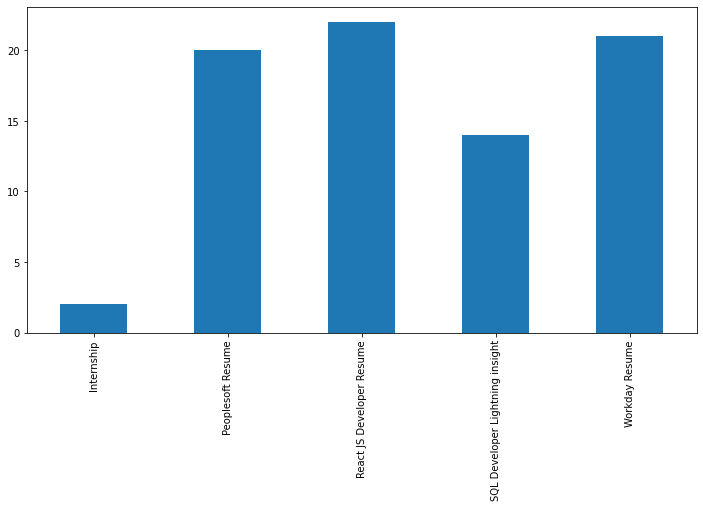

In [12]:
# df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
df['category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

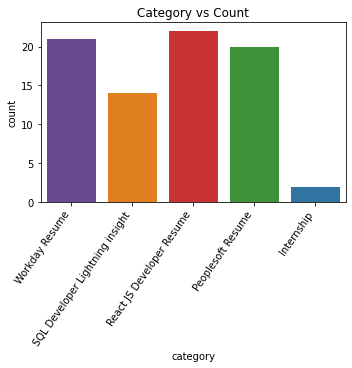

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
ax = sns.countplot(x="category", data=df,palette="Paired_r") #brg_r, palette="bright, OrRd
ax.set_xticklabels(ax.get_xticklabels(),rotation=55, ha="right")  #, ha="right"
plt.tight_layout()
plt.title("Category vs Count")
plt.show()

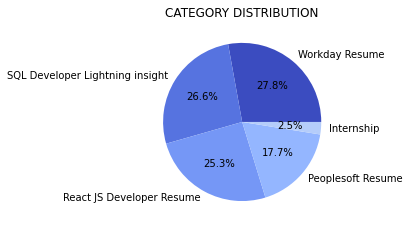

In [14]:
# pie plot
from matplotlib.gridspec import GridSpec
targetCounts = df.category.value_counts()
targetLabels  = df.category.unique()
# Make square figures and axes
plt.figure(1, figsize=(8,8))
the_grid = GridSpec(2, 2)


cmap = plt.get_cmap('coolwarm')  #magma') # plasma, winter_r, 'YlOrRd') # plasma, winter_r 
colors = [cmap(i) for i in np.linspace(0, 1, 12)]
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=False, colors=colors)
plt.show()

In [15]:
# https://towardsdatascience.com/text-analysis-basics-in-python-443282942ec5

from sklearn.feature_extraction.text import CountVectorizer
c_vec = CountVectorizer(stop_words=stop, ngram_range=(2,2))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['content'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_bigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'bigram'})
df_bigram

,frequency,bigram
0,117,sql server
1,107,process scheduler
2,100,react js
3,93,application server
4,77,people tools
...,...,...
21758,1,abilities skills
21759,1,abilities problem
21760,1,abilities good
21761,1,abilities communication


In [16]:
c_vec = CountVectorizer(stop_words=stop, ngram_range=(3,3))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['content'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_trigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'trigram'})
df_trigram

,frequency,trigram
0,37,application server domains
1,36,process scheduler servers
2,35,server domains process
3,35,domains process scheduler
4,27,web server domains
...,...,...
28720,1,abilities problem solving
28721,1,abilities good experience
28722,1,abilities communication skills
28723,1,abdul sharuk years


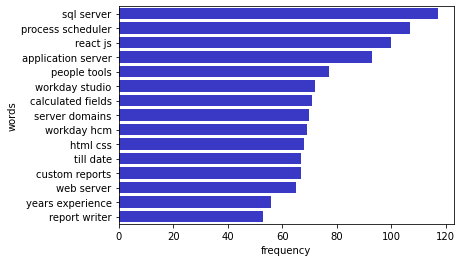

In [17]:
sns.barplot(y='bigram',x = 'frequency', data=df_bigram.head(15),color="b", saturation = 0.55)  # palette ='bright', edgecolor='g', linewidth=4
# ax = sns.countplot(x="category", data=df,palette="bright")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha="right")  #, ha="right"

# plt.xticks(rotation = 90)
plt.ylabel(ylabel='words',loc='center')
plt.show()

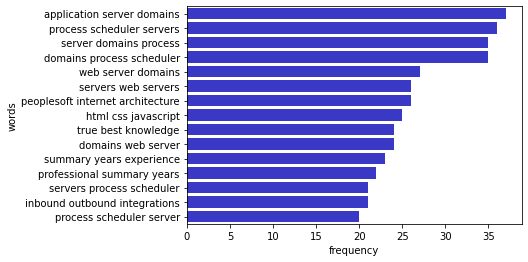

In [18]:
sns.barplot(y='trigram',x = 'frequency', data=df_trigram.head(15),color="b", saturation = 0.55)  # palette ='bright', edgecolor='g', linewidth=4
# ax = sns.countplot(x="category", data=df,palette="bright")
# ax.set_xticklabels(ax.get_xticklabels(), rotation=55, ha="right")  #, ha="right"

# plt.xticks(rotation = 90)
plt.ylabel(ylabel='words',loc='center')
plt.show()

In [19]:
c_vec = CountVectorizer(stop_words=stop, ngram_range=(1, 1))
# matrix of ngrams
ngrams = c_vec.fit_transform(df['content'])
# count frequency of ngrams
count_values = ngrams.toarray().sum(axis=0)
# list of ngrams
vocab = c_vec.vocabulary_
df_unigram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
            ).rename(columns={0: 'frequency', 1:'unigram'})
df_unigram

,frequency,unigram
0,598,experience
1,453,peoplesoft
2,431,workday
3,418,application
4,395,using
...,...,...
4551,1,academics
4552,1,abstraction
4553,1,absent
4554,1,abs


In [20]:
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
# Sentences = df['Resumes'].values
Sentences = df['content'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('experience', 598), ('peoplesoft', 453), ('workday', 431), ('application', 418), ('using', 395), ('server', 360), ('data', 332), ('reports', 326), ('project', 326), ('sql', 280), ('business', 273), ('web', 250), ('database', 243), ('process', 236), ('worked', 220), ('knowledge', 216), ('client', 197), ('system', 192), ('involved', 191), ('tools', 190), ('integrations', 189), ('integration', 183), ('hcm', 182), ('like', 180), ('support', 178), ('skills', 171), ('good', 169), ('development', 168), ('team', 166), ('creating', 164), ('working', 162), ('technical', 160), ('people', 160), ('services', 157), ('report', 155), ('design', 154), ('servers', 152), ('testing', 150), ('created', 150), ('react', 148), ('various', 146), ('oracle', 143), ('role', 142), ('developer', 139), ('environment', 139), ('responsibilities', 137), ('management', 136), ('eib', 134), ('security', 134), ('production', 133), ('issues', 132), ('core', 128), ('studio', 128), ('custom', 124), ('work', 124), ('js', 123

In [21]:
wn = WordNetLemmatizer() 
lem_words=[]
for word in wordfreqdist:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [22]:
lem_words

['experience',
 'peoplesoft',
 'workday',
 'application',
 'using',
 'server',
 'data',
 'report',
 'project',
 'sql',
 'business',
 'web',
 'database',
 'process',
 'worked',
 'knowledge',
 'client',
 'system',
 'involved',
 'tool',
 'integration',
 'integration',
 'hcm',
 'like',
 'support',
 'skill',
 'good',
 'development',
 'team',
 'creating',
 'working',
 'technical',
 'people',
 'service',
 'report',
 'design',
 'server',
 'testing',
 'created',
 'react',
 'various',
 'oracle',
 'role',
 'developer',
 'environment',
 'responsibility',
 'management',
 'eib',
 'security',
 'production',
 'issue',
 'core',
 'studio',
 'custom',
 'work',
 'j',
 'window',
 'application',
 'date',
 'domain',
 'developed',
 'new',
 'professional',
 'scheduler',
 'requirement',
 'code',
 'e',
 'test',
 'technology',
 'field',
 'consultant',
 'used',
 'html',
 'change',
 'requirement',
 'user',
 'year',
 'fscm',
 'end',
 'system',
 'software',
 'responsible',
 'information',
 'based',
 'c',
 'reporting'

In [23]:
df['content'].values

array(['chinna subbarayudu dob th march nationality indian profile summary around years experience developing implementation erp technology using workday hcm etl informatica technologies years experience workday integration consultant involved maintenance implementation experience phases workday like requirements gathering analysis design development testing hands experience inbound outbound integrations using core connector workday studio managing business processes working eib report writer developed maintained custom report types advanced matrix composite using report writer tool involved transformation xml xslt presenting data different web services building workday integration eib calculated fields custom reports writing xslt transformation code developed testing strategies validation scenarios along project scope requirement documents prioritizing reproducing verifying bug fixes different workday integrations knowledge xml wd soap web service wd rest web service experienced using

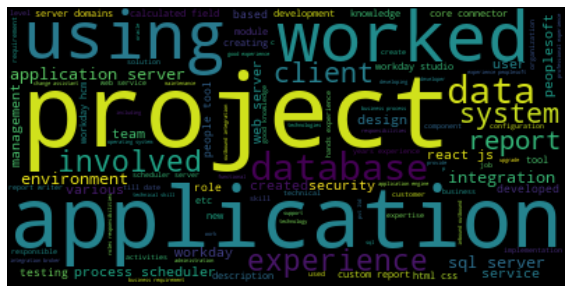

In [24]:
wc = WordCloud().generate(str(df['content'].values))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

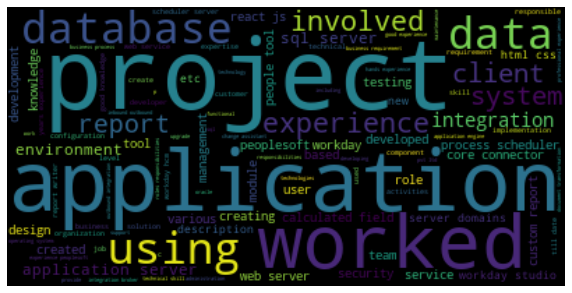

In [25]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
categories = np.sort(df['category'].unique())
categories

array(['Internship', 'Peoplesoft Resume', 'React JS Developer Resume',
       'SQL Developer Lightning insight', 'Workday Resume'], dtype=object)

In [27]:
# df_categories = [df[df['Category'] == category].loc[:, ['Resumes', 'Category']] for category in categories]
df_categories = [df[df['category'] == category].loc[:, ['content', 'category']] for category in categories]

df_categories

[                                              content    category
 77  name ravali p curriculum vitae specialization ...  Internship
 78  susovan bag seeking challenging position field...  Internship,
                                               content           category
 57  r ahmed peoplesoft technical consultant profes...  Peoplesoft Resume
 58  classification internal classification interna...  Peoplesoft Resume
 59  profile summary years experience implementing ...  Peoplesoft Resume
 60  rahul ahuja summary years experience peoplesof...  Peoplesoft Resume
 61  peoplesoft admin peoplesoft dba ganesh alladi ...  Peoplesoft Resume
 62  sirazuddin bangalore india sirazuddin bangalor...  Peoplesoft Resume
 63  c n c address manyata tech park nagavara banga...  Peoplesoft Resume
 64  tanna sujatha objective seeking challenging ro...  Peoplesoft Resume
 65  anubhav kumar singh core competencies scriptin...  Peoplesoft Resume
 66  vinod akkala peoplesoft dba admin professional...  Pe

In [28]:
def wordcloud(df):
#     txt = ' '.join(txt for txt in df['Resumes'])
    txt = ' '.join(txt for txt in df['content'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

In [29]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'
plt.style.use(PLOT_PALETTE)
%matplotlib inline

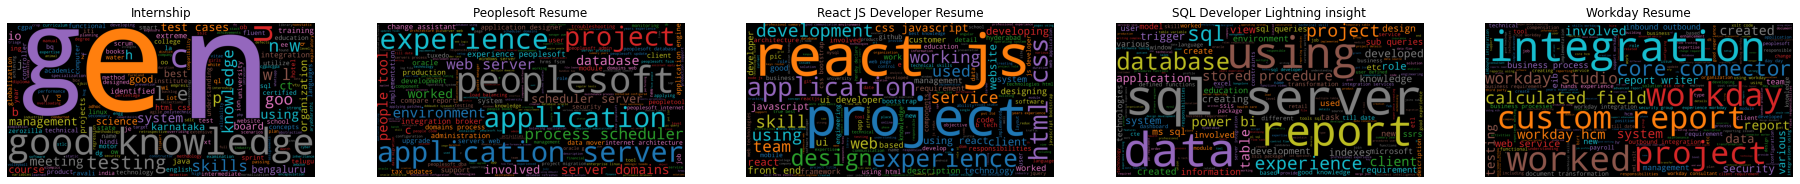

In [30]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [31]:
def wordfreq(df):
#     count = df['Resumes'].str.split(expand=True).stack().value_counts().reset_index()
    count = df['content'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

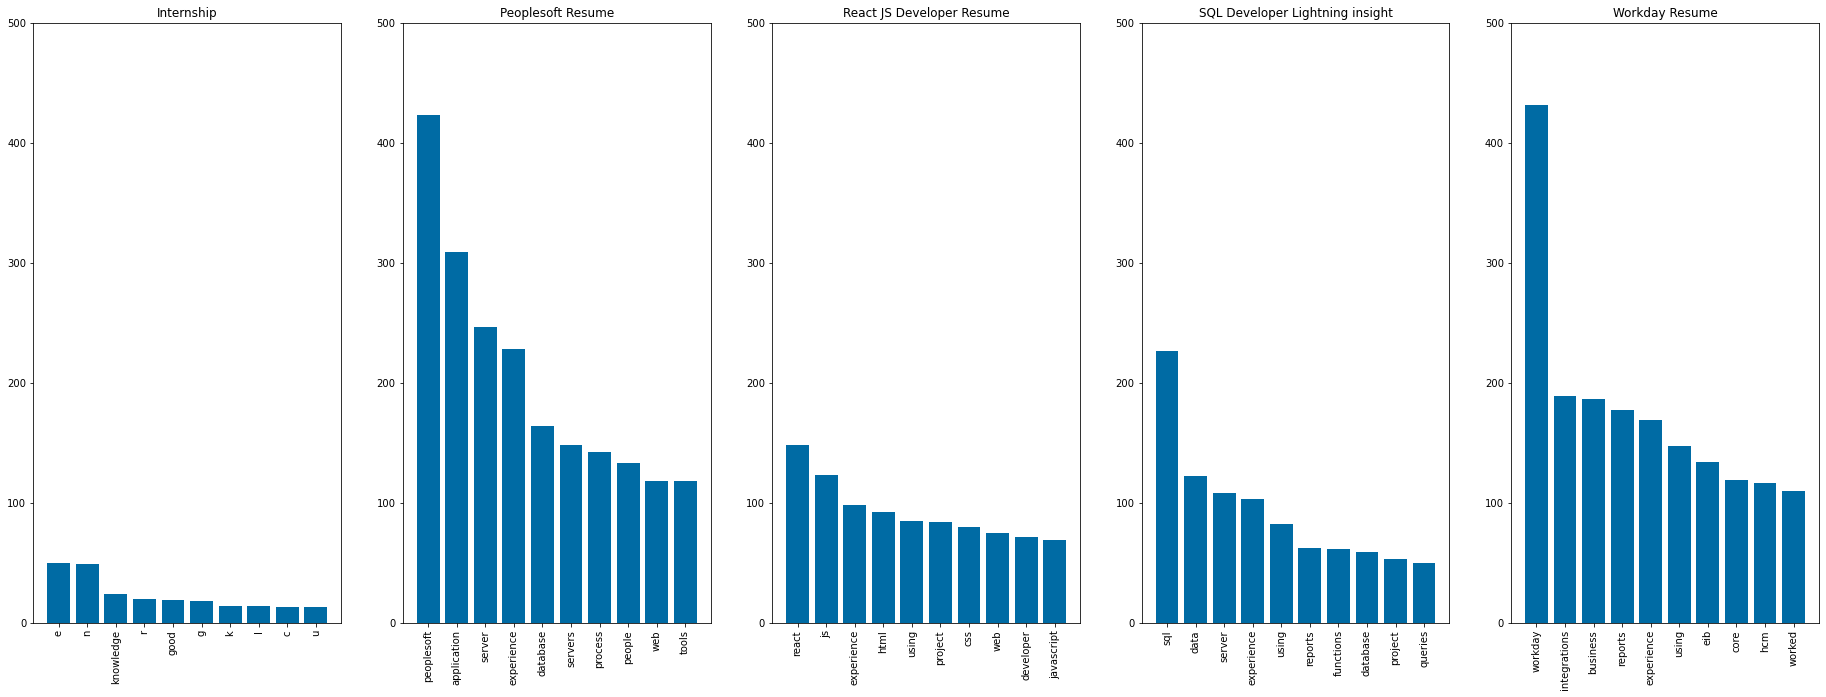

In [32]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.xticks(rotation = 90)
    plt.ylim(0, 500)

plt.show()
plt.close()

In [33]:
# var_mod = ['Category']
var_mod = ['category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [34]:
df

,content,category,file_name
0,chinna subbarayudu dob th march nationality in...,4,ChinnaSubbarayuduM_Hexaware.docx
1,madeeswar profile summary around years experie...,4,Madeeswar A_Hexaware.doc
2,srikanth workday hcm consultant seeking suitab...,4,Srikanth-Hexaware.docx
3,shireesh balasani hcm consultant profile summa...,4,ShireeshKumar_Hexaware.doc
4,mooraboyina guravaiah workday integration spec...,4,MooraboyinaGuravaiah_Hexaware.docx
...,...,...,...
74,murali professional summary years experience p...,1,Peoplesoft FSCM_Murali.docx
75,peoplesoft admin varkala vikas career objectiv...,1,Peoplesoft Admin_Varkala Vikas.docx
76,arun venu experience summary experience years ...,1,Peoplesoft Finance_Arun Venu.doc
77,name ravali p curriculum vitae specialization ...,0,Internship_Ravali_Musquare Technologies (1).docx


In [35]:
# df.Category.value_counts()
df.category.value_counts()

2    22
4    21
1    20
3    14
0     2
Name: category, dtype: int64

<AxesSubplot:xlabel='count', ylabel='category'>

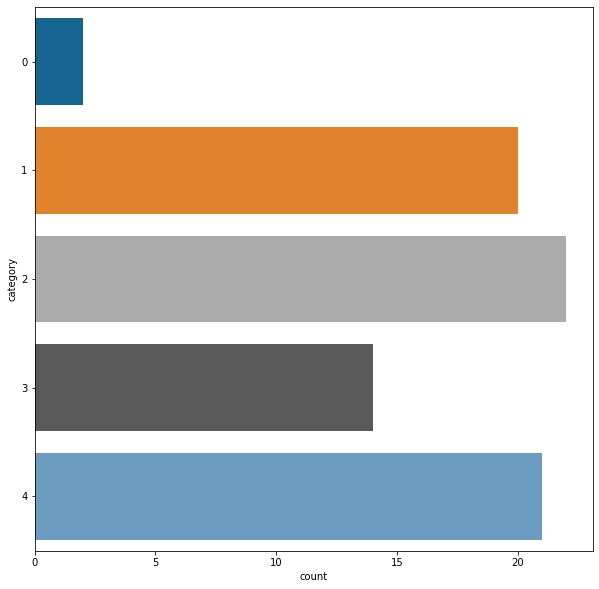

In [36]:
plt.figure(figsize=(10,10))
plt.xticks()
# sns.countplot(y="Category", data=df)
sns.countplot(y="category", data=df)